In [1]:
# Import dependencies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from citipy import citipy 

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high = 90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | okhotsk
Processing Record 4 of Set 1 | bonavista
Processing Record 5 of Set 1 | saint-pierre
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | camacha
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | ahipara
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | pangody
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | saleaula
City not found. Skipping...
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | demerval lobao
Pr

Processing Record 38 of Set 4 | farafangana
Processing Record 39 of Set 4 | chippewa falls
Processing Record 40 of Set 4 | santa rosa
Processing Record 41 of Set 4 | port lincoln
Processing Record 42 of Set 4 | santa ana
Processing Record 43 of Set 4 | vanimo
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | norman wells
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | aflu
City not found. Skipping...
Processing Record 48 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 4 | yingzhong
City not found. Skipping...
Processing Record 50 of Set 4 | gat
Processing Record 1 of Set 5 | clyde river
Processing Record 2 of Set 5 | ambulu
Processing Record 3 of Set 5 | prince rupert
Processing Record 4 of Set 5 | pangnirtung
Processing Record 5 of Set 5 | talaya
Processing Record 6 of Set 5 | komsomolskiy
Processing Record 7 of Set 5 | muhos
Processing Record 8 of Set 5 | aksarka
Processing Record 9 of Set 5 | linjian

Processing Record 26 of Set 8 | anderson
Processing Record 27 of Set 8 | paraopeba
Processing Record 28 of Set 8 | coquimbo
Processing Record 29 of Set 8 | mongo
Processing Record 30 of Set 8 | los llanos de aridane
Processing Record 31 of Set 8 | manoel urbano
Processing Record 32 of Set 8 | christchurch
Processing Record 33 of Set 8 | pak phanang
Processing Record 34 of Set 8 | pointe-noire
Processing Record 35 of Set 8 | kununurra
Processing Record 36 of Set 8 | beira
Processing Record 37 of Set 8 | zhanakorgan
Processing Record 38 of Set 8 | cap malheureux
Processing Record 39 of Set 8 | bargal
City not found. Skipping...
Processing Record 40 of Set 8 | kpagouda
City not found. Skipping...
Processing Record 41 of Set 8 | te anau
Processing Record 42 of Set 8 | thinadhoo
Processing Record 43 of Set 8 | tarakan
Processing Record 44 of Set 8 | barcelona
Processing Record 45 of Set 8 | tando jam
Processing Record 46 of Set 8 | edissiya
Processing Record 47 of Set 8 | moree
Processing R

Processing Record 13 of Set 12 | leh
Processing Record 14 of Set 12 | bodmin
Processing Record 15 of Set 12 | faanui
Processing Record 16 of Set 12 | novelda
Processing Record 17 of Set 12 | westport
Processing Record 18 of Set 12 | tarudant
City not found. Skipping...
Processing Record 19 of Set 12 | kloulklubed
Processing Record 20 of Set 12 | villa constitucion
Processing Record 21 of Set 12 | borazjan
Processing Record 22 of Set 12 | tolaga bay
Processing Record 23 of Set 12 | mbandaka
Processing Record 24 of Set 12 | rabaul
Processing Record 25 of Set 12 | lawan kuda baharu
City not found. Skipping...
Processing Record 26 of Set 12 | morondava
Processing Record 27 of Set 12 | buala
Processing Record 28 of Set 12 | morant bay
Processing Record 29 of Set 12 | lagunas
Processing Record 30 of Set 12 | zhezkazgan
Processing Record 31 of Set 12 | hovd
Processing Record 32 of Set 12 | maumere
Processing Record 33 of Set 12 | ossora
Processing Record 34 of Set 12 | harper
Processing Recor

In [11]:
len(city_data)

567

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,84.16,69,0,25.32,BR,2022-01-25 19:48:59
1,Okhotsk,59.3833,143.3000,-6.52,99,99,5.41,RU,2022-01-25 19:53:28
2,Bonavista,48.6499,-53.1147,31.12,72,100,8.95,CA,2022-01-25 19:53:28
3,Saint-Pierre,-21.3393,55.4781,74.88,69,100,10.36,RE,2022-01-25 19:53:29
4,Pevek,69.7008,170.3133,-23.64,99,100,2.44,RU,2022-01-25 19:53:29
5,Camacha,33.0833,-16.3333,58.42,67,40,19.57,PT,2022-01-25 19:53:29
6,Punta Arenas,-53.1500,-70.9167,51.82,57,40,26.46,CL,2022-01-25 19:52:31
7,Hermanus,-34.4187,19.2345,67.80,73,70,14.85,ZA,2022-01-25 19:53:29
8,Bredasdorp,-34.5322,20.0403,67.32,73,100,5.75,ZA,2022-01-25 19:53:25
9,Saint-Philippe,-21.3585,55.7679,74.79,68,88,11.36,RE,2022-01-25 19:53:30


In [13]:
#Re-order columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2022-01-25 19:48:59,-22.9661,-42.0278,84.16,69,0,25.32
1,Okhotsk,RU,2022-01-25 19:53:28,59.3833,143.3000,-6.52,99,99,5.41
2,Bonavista,CA,2022-01-25 19:53:28,48.6499,-53.1147,31.12,72,100,8.95
3,Saint-Pierre,RE,2022-01-25 19:53:29,-21.3393,55.4781,74.88,69,100,10.36
4,Pevek,RU,2022-01-25 19:53:29,69.7008,170.3133,-23.64,99,100,2.44
5,Camacha,PT,2022-01-25 19:53:29,33.0833,-16.3333,58.42,67,40,19.57
6,Punta Arenas,CL,2022-01-25 19:52:31,-53.1500,-70.9167,51.82,57,40,26.46
7,Hermanus,ZA,2022-01-25 19:53:29,-34.4187,19.2345,67.80,73,70,14.85
8,Bredasdorp,ZA,2022-01-25 19:53:25,-34.5322,20.0403,67.32,73,100,5.75
9,Saint-Philippe,RE,2022-01-25 19:53:30,-21.3585,55.7679,74.79,68,88,11.36


In [45]:
# Create the output file (csv).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

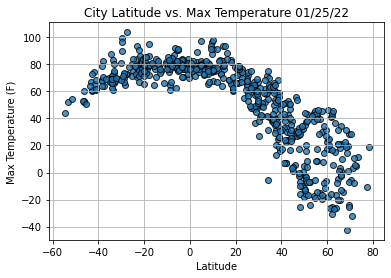

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

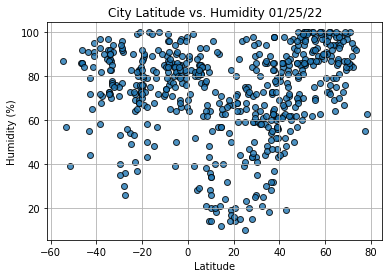

In [48]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

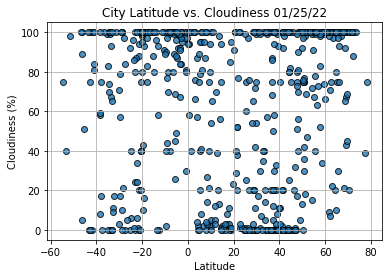

In [49]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

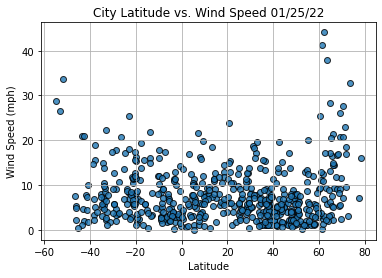

In [50]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [70]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [71]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

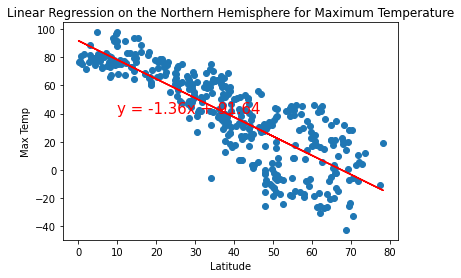

In [72]:
# Linear regression on the Northern Hemisphere (Lat. vs. Max Temp).
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

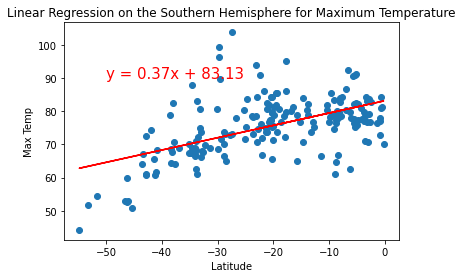

In [73]:
# Linear regression on the Southern Hemisphere (Lat. vs. Max Temp).
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

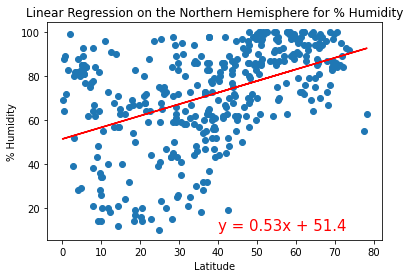

In [74]:
# Linear regression on the Northern Hemisphere (Lat vs Humidity).
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

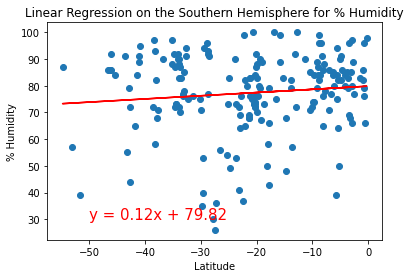

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,30))

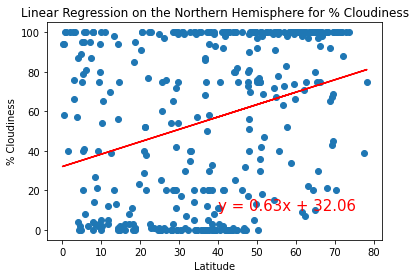

In [83]:
# Linear regression on the Northern Hemisphere (Lat vs % Cloudiness).
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

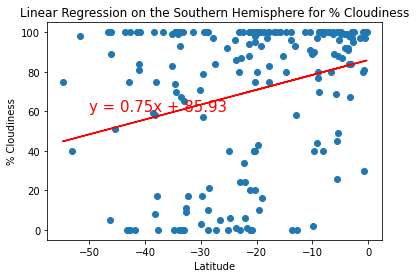

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

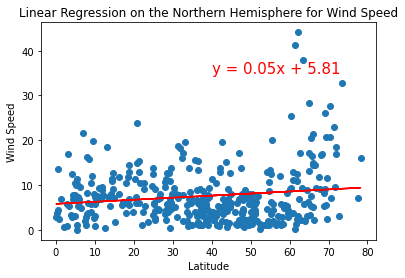

In [87]:
# Linear regression on the Northern Hemisphere (Lat vs Wind Speed).
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

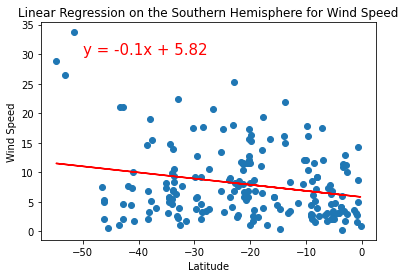

In [89]:
# Linear regression on the Southern Hemisphere (Lat vs. Wind Speed).
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,30))